<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
Neural mlp mnist classifier 
</font>
</h1>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score


In [2]:
train_data = pd.read_csv('../data/mnist_train.csv')
test_data = pd.read_csv('../data/mnist_test.csv')


train_data.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


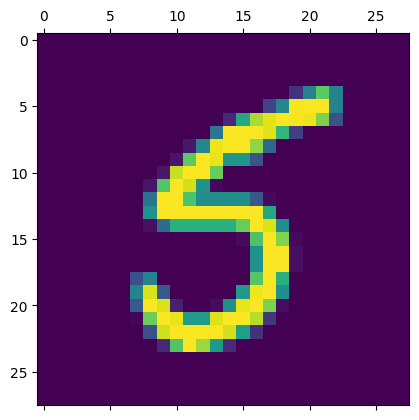

In [3]:
img01 = train_data.iloc[2].to_numpy()[1:].reshape(28, 28)
plt.matshow(img01)

In [4]:
label = train_data['label']

train_data.drop(columns=['label'], inplace=True)

In [5]:
std = StandardScaler()
train_data_scale = std.fit_transform(train_data)

test_data_scale = std.transform(test_data)

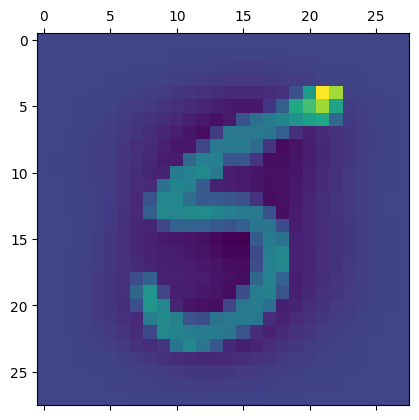

In [6]:
img02 = train_data_scale[2].reshape(28, 28)
plt.matshow(img02)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_data_scale, label, random_state=42, test_size=0.20)

In [8]:
model = MLPClassifier(
    hidden_layer_sizes=(32, 64, 128, 256),
    solver='adam',
    alpha=0.002,
    max_iter=100,
    n_iter_no_change=60,
    early_stopping=True,
    verbose=True
)

In [9]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.50499102
Validation score: 0.935417
Iteration 2, loss = 0.17749450
Validation score: 0.950833
Iteration 3, loss = 0.12736986
Validation score: 0.951250
Iteration 4, loss = 0.10142627
Validation score: 0.956458
Iteration 5, loss = 0.08369790
Validation score: 0.961875
Iteration 6, loss = 0.06775337
Validation score: 0.960000
Iteration 7, loss = 0.05760784
Validation score: 0.959375
Iteration 8, loss = 0.04792461
Validation score: 0.959583
Iteration 9, loss = 0.04265030
Validation score: 0.963333
Iteration 10, loss = 0.04080527
Validation score: 0.961875
Iteration 11, loss = 0.03263006
Validation score: 0.956042
Iteration 12, loss = 0.03360977
Validation score: 0.963958
Iteration 13, loss = 0.02406811
Validation score: 0.965625
Iteration 14, loss = 0.02747965
Validation score: 0.961667
Iteration 15, loss = 0.02694306
Validation score: 0.961875
Iteration 16, loss = 0.02205602
Validation score: 0.963125
Iteration 17, loss = 0.02130076
Validation score: 0.962917
Iterat

C:\Users\PARIYA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.002, early_stopping=True,
              hidden_layer_sizes=(32, 64, 128, 256), max_iter=100,
              n_iter_no_change=60, verbose=True)

In [10]:
pred_val = model.predict(X_val)

f1_score(pred_val, y_val, average='macro')

0.9622442915599354

In [11]:
test_pred = model.predict(test_data_scale)
submission = pd.DataFrame(test_pred, columns=['label'])
submission

,label
0,9
1,5
2,0
3,8
4,8
...,...
9995,5
9996,1
9997,6
9998,6
